Data Set : https://www.kaggle.com/competitions/digit-recognizer

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### READ TRAIN

In [59]:
# Read Train:
train=pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### READ TEST

In [60]:
# Read Test:
test=pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### SEPARATE LABEL from TRAIN DATA

In [61]:
# Separate label from Train Data:
Y_train= train["label"]
# Drop label column from Train Data:
X_train=train.drop(labels=["label"],axis=1)

In [62]:
print(Y_train.shape)
print(X_train.shape)

(42000,)
(42000, 784)


### VISUALIZE LABEL

In [63]:
train["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

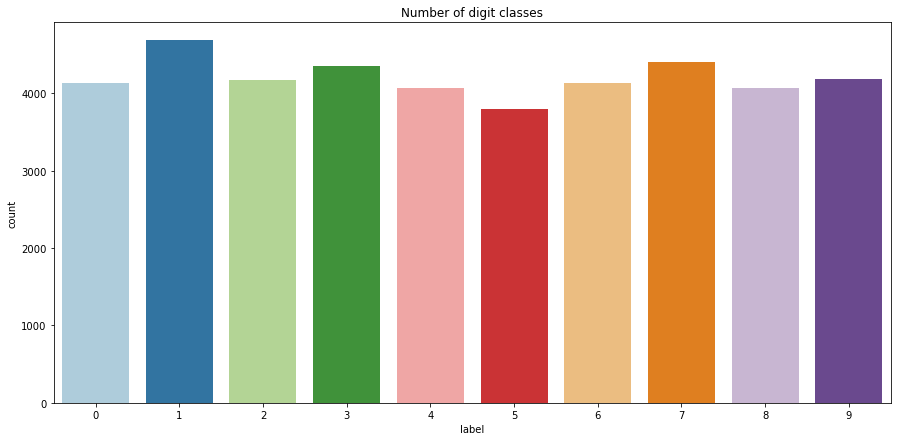

In [64]:
plt.figure(figsize=(15,7))
g=sns.countplot(Y_train,palette="Paired")
plt.title("Number of digit classes");
#Y_train.value_counts()

### PLOT SOME SAMPLES

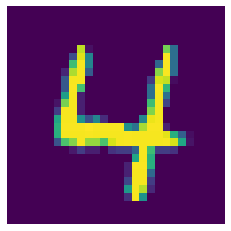

In [65]:
img=X_train.iloc[42].to_numpy()
img=img.reshape((28,28))
plt.imshow(img)
plt.axis("off")
plt.show()

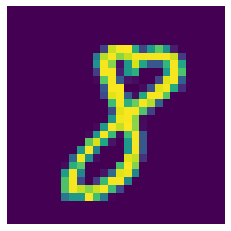

In [66]:
img=X_train.iloc[82].to_numpy()
img=img.reshape((28,28))
plt.imshow(img)
plt.axis("off")
plt.show()

### NORMALIZE THE DATA
* Grayscale normalization to reduce the effect of illumination's differences.
* /255.0 => Grayscale

In [67]:
X_train=X_train/255.0
test=test/255.0
print("Shape of X Train: " ,X_train.shape)
print("Shape of Test: ",test.shape)

Shape of X Train:  (42000, 784)
Shape of Test:  (28000, 784)


### RESHAPE THE DATA
* Train and test images (28 x 28)
* We reshape all data to 28x28x1 3D matrices. 
    
######    1. 28x28x1 1=> Gray Scale
######    2. 3 => RGB (Red, Green, Blue)
    

* Keras needs an extra dimension in the end which correspond to channels.
* Our images are gray scaled so it use only one channel.

In [68]:
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)
print("Shape of X Train: " ,X_train.shape)
print("Shape of Test: ",test.shape)

Shape of X Train:  (42000, 28, 28, 1)
Shape of Test:  (28000, 28, 28, 1)


### LABEL ENCODING
Encode labels to one hot vectors

* 2 => [0,0,1,0,0,0,0,0,0,0]

* 4 => [0,0,0,0,1,0,0,0,0,0]

In [69]:
from keras.utils.np_utils import to_categorical

Y_train=to_categorical(Y_train,num_classes=10)

### TRAIN TEST SPLIT

In [71]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X_train,
                                             Y_train,
                                             test_size=0.10,
                                            random_state=2)
print("Shape of X Train: ",X_train.shape)
print("Shape of X Validation: ",X_val.shape)
print("Shape of Y Train: ",y_train.shape)
print("Shape of Y Validation: ",y_val.shape)

Shape of X Train:  (37800, 28, 28, 1)
Shape of X Validation:  (4200, 28, 28, 1)
Shape of Y Train:  (37800, 10)
Shape of Y Validation:  (4200, 10)


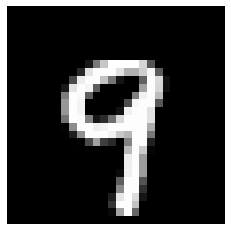

In [80]:
# Check some of them:
plt.imshow(X_train[90][:,:,0],cmap="gray")
plt.axis("off")
plt.show()

# CONVOLUTIONAL NEURAL NETWORK

* CNN is used for image classification, object detection

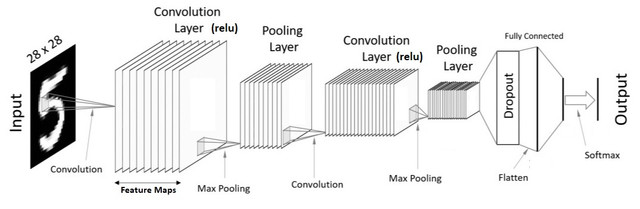



###### What is Convolution Operation?
* We have some image and feature detector(3*3)
* Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.
* Feature detector = kernel = filter
* Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
* feature map = conv(input image, feature detector). Element wise multiplication of matrices.
* feature map = convolved feature
* Stride = navigating in input image.
* We reduce the size of image. This is important bc code runs faster. However, we lost information.
* We create multiple feature maps bc we use multiple feature detectors(filters).
* Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]

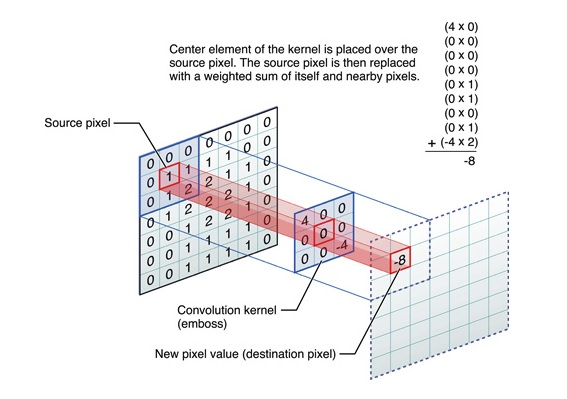

* After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.

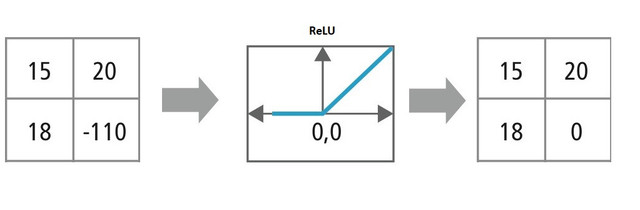

## PADDING

* As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.
* Input size and output size are same.
* We will use Same Padding


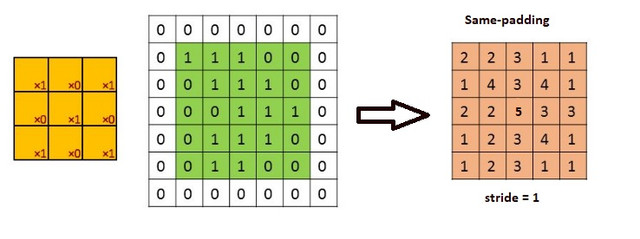

## POOLING

* It makes down-sampling or sub-sampling (Reduces the number of parameters)
* It makes the detection of features invariant to scale or orientation changes.
* It reduce the amount of parameters and computation in the network, and hence to also control overfitting.
* We will use max pooling

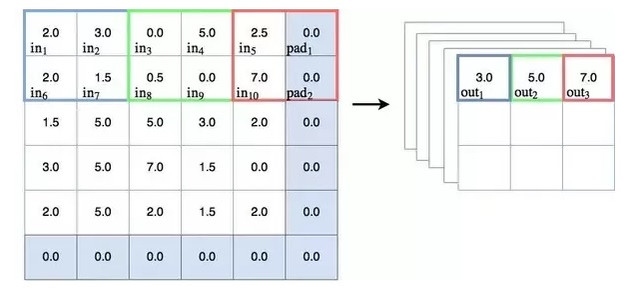

## FLATTENING

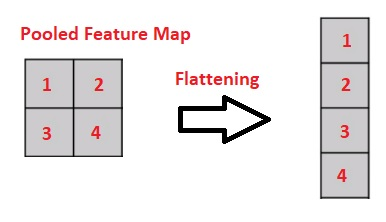

# CNN with KERAS

* conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)


* Dropout: Dropout is a technique where randomly selected neurons are ignored during training


In [95]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [91]:
model=Sequential()

# 1. LAYER

model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",
                 activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2. LAYER

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

# FULLY CONNECTION

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

### DEFINE OPTIMIZER
* Adam optimizer: Change the learning rate


In [97]:
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

### COMPILE the MODEL

In [98]:
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

### EPOCH and BATCH SIZE

Say you have a dataset of 10 examples (or samples). You have a batch size of 2, and you've specified you want the algorithm to run for 3 epochs. Therefore, in each epoch, you have 5 batches (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations per epoch.


In [107]:
epochs=10
batch_size=250

# DATA AUGMENTATION

* To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
* Alter the training data with small transformations to reproduce the variations of digit.
* For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated.

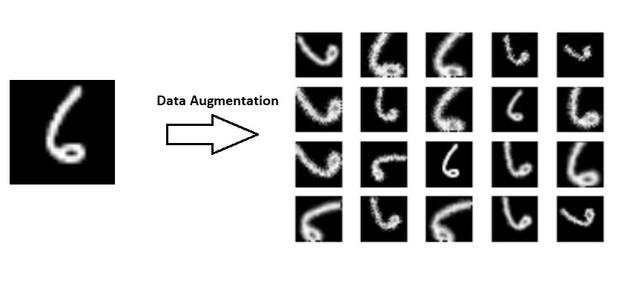

In [101]:
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0 over dataset
                          samplewise_center=False, #set each sample mean to 0
                          featurewise_std_normalization=False,#divide inputs by std of dataset
                          samplewise_std_normalization=False,#divide each inputs by its std 
                          zca_whitening=False, # Dimension reduction
                          rotation_range=5,#randomly rotate images in range 5 degrees
                          zoom_range=0.1, # Randomly zoom image %10
                          width_shift_range=0.1, #Randomly shift images horizontally %10
                          height_shift_range=0.1, #Randomly shift images vertically %10
                          horizontal_flip=False, # Randomly flip images
                          vertical_flip=False) # Randomly flip images
datagen.fit(X_train)

### FIT THE MODEL

In [110]:
history=model.fit_generator(datagen.flow(X_train,y_train,
                                         batch_size=batch_size),
                                        epochs=epochs,
                                        validation_data=(X_val,y_val),
                                        steps_per_epoch=X_train.shape[0]//batch_size)

Epoch 1/10
151/151 [==============================] - 11s 68ms/step - loss: 1.1441 - accuracy: 0.6179 - val_loss: 0.2356 - val_accuracy: 0.9381
Epoch 2/10
151/151 [==============================] - 10s 69ms/step - loss: 0.4692 - accuracy: 0.8519 - val_loss: 0.1386 - val_accuracy: 0.9614
Epoch 3/10
151/151 [==============================] - 11s 74ms/step - loss: 0.3340 - accuracy: 0.8957 - val_loss: 0.1086 - val_accuracy: 0.9671
Epoch 4/10
151/151 [==============================] - 11s 76ms/step - loss: 0.2775 - accuracy: 0.9141 - val_loss: 0.0889 - val_accuracy: 0.9738
Epoch 5/10
151/151 [==============================] - 12s 81ms/step - loss: 0.2398 - accuracy: 0.9256 - val_loss: 0.0732 - val_accuracy: 0.9790
Epoch 6/10
151/151 [==============================] - 11s 76ms/step - loss: 0.2190 - accuracy: 0.9341 - val_loss: 0.0709 - val_accuracy: 0.9779
Epoch 7/10
151/151 [==============================] - 12s 77ms/step - loss: 0.1992 - accuracy: 0.9389 - val_loss: 0.0660 - val_accuracy:

## EVALUATE the MODEL
* Test Loss visualization
* Confusion matrix

###### Test Loss Visualization

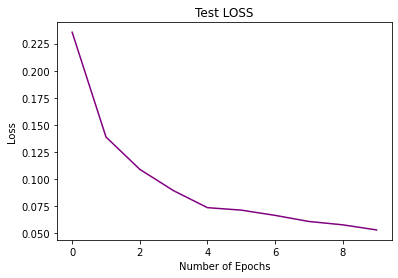

In [116]:
plt.plot(history.history["val_loss"],color="purple",label="validation loss")
plt.title("Test LOSS")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.show();

###### Confusion Matrix

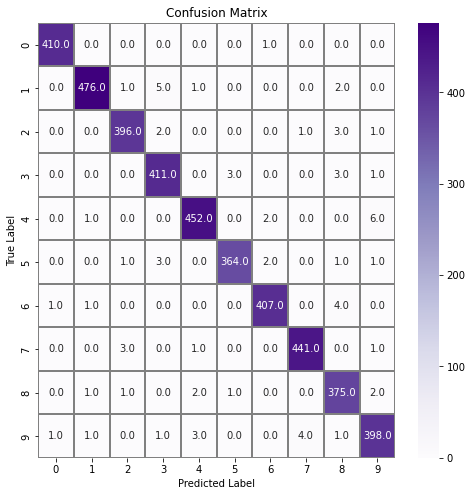

In [125]:
y_pred=model.predict(X_val) # Predict the values from the validation dataset
y_pred_class=np.argmax(y_pred,axis=1)# Convert predictions classes to one hot vectors 
y_true=np.argmax(y_val,axis=1) # Convert validation observations to one hot vectors
confusionMatrix=confusion_matrix(y_true,y_pred_class)#Compute the confusion matrix

# PLOT CONFUSION MATRIX

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show(
